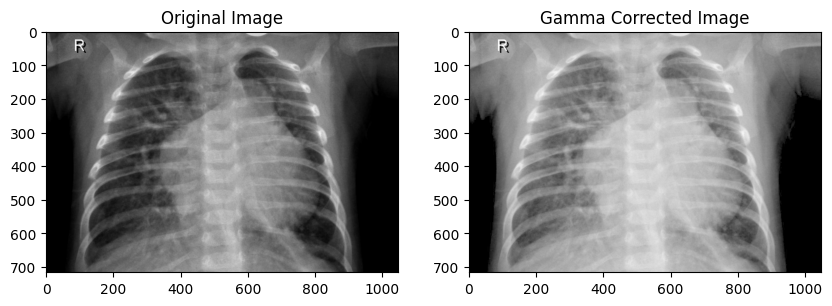

In [9]:
!pip install opencv-python scikit-image

import cv2
import numpy as np
from skimage import exposure, filters
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/person1017_bacteria_2948.jpeg')
gamma_corrected = gamma_correction(image, gamma=2.0)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()

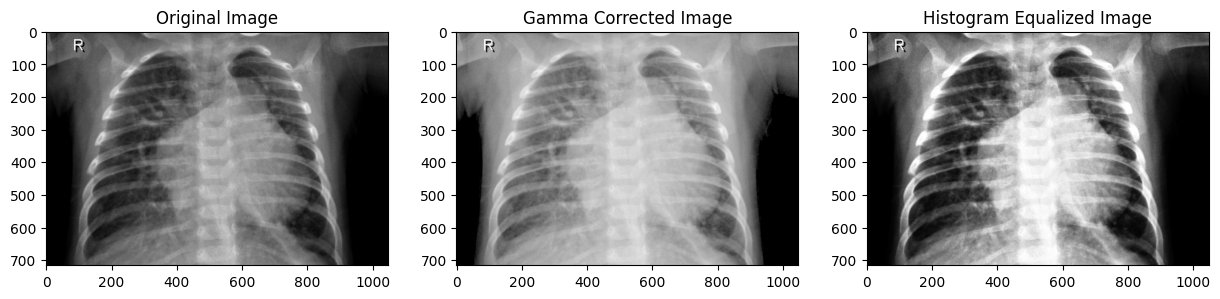

In [10]:
# prompt: Histogram equalization

import cv2
import numpy as np
from skimage import exposure, filters
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load image (assuming it's already loaded as 'image')
# If not, uncomment and adjust the path:
# image = cv2.imread('/content/person1017_bacteria_2948.jpeg')

# Histogram equalization
img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
hist_equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


# Display the results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title('Gamma Corrected Image')
gamma_corrected = gamma_correction(image, gamma=2.0) # Reuse gamma correction
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.title('Histogram Equalized Image')
plt.imshow(cv2.cvtColor(hist_equalized, cv2.COLOR_BGR2RGB))

plt.show()

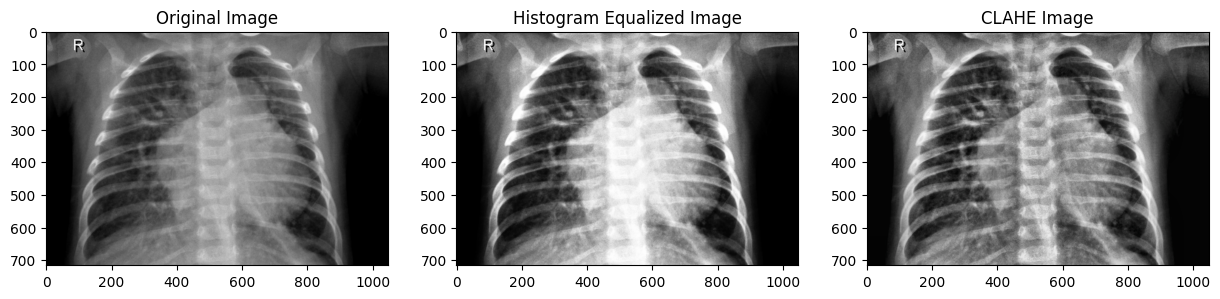

In [15]:
# Load image
image = cv2.imread('/content/person1017_bacteria_2948.jpeg')

# Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
l2 = clahe.apply(l)
lab = cv2.merge((l2,a,b))
clahe_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)


# Display the results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Histogram equalization
img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
hist_equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

plt.subplot(1,3,2)
plt.title('Histogram Equalized Image')
plt.imshow(cv2.cvtColor(hist_equalized, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.title('CLAHE Image')
plt.imshow(cv2.cvtColor(clahe_image, cv2.COLOR_BGR2RGB))

plt.show()